### watershed, erode, dilate 이용 예제코드

In [1]:
#erode
import cv2 as cv
import numpy as np

mat = np.array([[0, 1, 2, 3],
                [4, 5, 6, 7],
                [8, 9, 8, 7],
                [6, 5, 4, 3]], np.uint8)
print('mat')
print(mat)

# kernel 안 모든 원소 이용
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], np.uint8)
print('kernel')
print(kernel)
# kernel의 0아닌 값이 가리키는 이웃픽셀들의 최솟값
eroded = cv.erode(mat, kernel)
print('eroded')
print(eroded)

# kernel= None으로 넣어주면 1로 채워진 3x3 kernel이 자동 적용
eroded = cv.erode(mat, None)
print(eroded)

print('\nmat')
print(mat)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
print('kernel')
print(kernel)
eroded = cv.erode(mat, kernel)
print('eroded')
print(eroded)

# 침식 결과를 또 침식
eroded_eroded = cv.erode(eroded, kernel)
print('eroded_eroded')
print(eroded_eroded)

# 두번 침식 한줄로 해결
eroded_iteration2 = cv.erode(mat, kernel, iterations=2)
print('eroded_iteration2')
print(eroded_iteration2)

mat
[[0 1 2 3]
 [4 5 6 7]
 [8 9 8 7]
 [6 5 4 3]]
kernel
[[1 1 1]
 [1 1 1]
 [1 1 1]]
eroded
[[0 0 1 2]
 [0 0 1 2]
 [4 4 3 3]
 [5 4 3 3]]
[[0 0 1 2]
 [0 0 1 2]
 [4 4 3 3]
 [5 4 3 3]]

mat
[[0 1 2 3]
 [4 5 6 7]
 [8 9 8 7]
 [6 5 4 3]]
kernel
[[0 1 0]
 [1 1 1]
 [0 1 0]]
eroded
[[0 0 1 2]
 [0 1 2 3]
 [4 5 4 3]
 [5 4 3 3]]
eroded_eroded
[[0 0 0 1]
 [0 0 1 2]
 [0 1 2 3]
 [4 3 3 3]]
eroded_iteration2
[[0 0 0 1]
 [0 0 1 2]
 [0 1 2 3]
 [4 3 3 3]]


In [3]:
# dilate
import cv2 as cv
import numpy as np

mat = np.array([[0, 1, 2, 3],
                [4, 5, 6, 7],
                [8, 9, 8, 7],
                [6, 5, 4, 3]], np.uint8)
print('mat')
print(mat)

# kernel 안 모든 원소 이용
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], np.uint8)
print('kernel')
print(kernel)
# kernel의 0아닌 값이 가리키는 이웃픽셀들의 최솟값
dilated = cv.dilate(mat, kernel)
print('dilated')
print(dilated)

# kernel= None으로 넣어주면 1로 채워진 3x3 kernel이 자동 적용
dilated = cv.dilate(mat, None)
print(dilated)

print('\nmat')
print(mat)

kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
print('kernel')
print(kernel)
dilate = cv.dilate(mat, kernel)
print('dilated')
print(dilated)

# 팽창팽창
dilated_dilated = cv.dilate(dilated, kernel)
print('dilated_dilated')
print(dilated_dilated)

# 두번 팽창 한줄로 해결
dilate_iteration2 = cv.dilate(mat, kernel, iterations=2)
print('dilate_iteration2')
print(dilate_iteration2)

mat
[[0 1 2 3]
 [4 5 6 7]
 [8 9 8 7]
 [6 5 4 3]]
kernel
[[1 1 1]
 [1 1 1]
 [1 1 1]]
dilated
[[5 6 7 7]
 [9 9 9 8]
 [9 9 9 8]
 [9 9 9 8]]
[[5 6 7 7]
 [9 9 9 8]
 [9 9 9 8]
 [9 9 9 8]]

mat
[[0 1 2 3]
 [4 5 6 7]
 [8 9 8 7]
 [6 5 4 3]]
kernel
[[0 1 0]
 [1 1 1]
 [0 1 0]]
dilated
[[5 6 7 7]
 [9 9 9 8]
 [9 9 9 8]
 [9 9 9 8]]
dilated_dilated
[[9 9 9 8]
 [9 9 9 9]
 [9 9 9 9]
 [9 9 9 9]]
dilate_iteration2
[[8 9 8 7]
 [9 9 9 8]
 [9 9 9 9]
 [9 9 9 8]]


In [6]:
# remove noise from noise
import cv2 as cv
import numpy as np
img = cv.imread('./images/face_with_noise.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(img_gray, 100, 255, cv.THRESH_BINARY)
mask_dilated = cv.dilate(mask, None, iterations=6)
background_mean = cv.mean(img, cv.bitwise_not(mask_dilated))
print(background_mean)
background = np.full(img.shape, background_mean[0:3], dtype=np.uint8)
mask_eroded = cv.erode(mask, None, iterations=3)
mask_eroded_dilated = cv.dilate(mask_eroded, None, iterations=6)
mask_eroded_dilated_not = cv.bitwise_not(mask_eroded_dilated)
face = cv.bitwise_and(img, img, mask=mask_eroded_dilated)
not_face = cv.bitwise_and(background, background, mask=mask_eroded_dilated_not)
img_without_noise = cv.add(face, not_face)
face_without_noise = cv.imread('face_without_noise.png')
print('Success = ', np.array_equal(img_without_noise, face_without_noise))
face_mask = cv.bitwise_and(mask, mask_eroded_dilated)
cv.imshow('img', img)
cv.imshow('img_gray', img_gray)
cv.imshow('mask', mask)
cv.imshow('mask_eroded', mask_eroded)
cv.imshow('mask_eroded_dilated', mask_eroded_dilated)
cv.imshow('mask_eroded_dilated_not', mask_eroded_dilated_not)
cv.imshow('face', face)
cv.imshow('not_face', not_face)
cv.imshow('img_without_noise', img_without_noise)
cv.imshow('face_mask', face_mask)
cv.waitKey()
cv.destroyAllWindows()

(204.0, 72.0, 63.0, 0.0)
Success =  False


## 동전분리 실습

sure_fg가 제대로 나오지않아 dist_transform을 binary 이미지로 변환할 때 threshold값을 조정해서 해결했다

watershed, markers 대해 더 알앙보기

ret 19 markers [[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 ...
 [10 10 10 ...  1  1  1]
 [10 10 10 ...  1  1  1]
 [10 10 10 ...  1  1  1]]


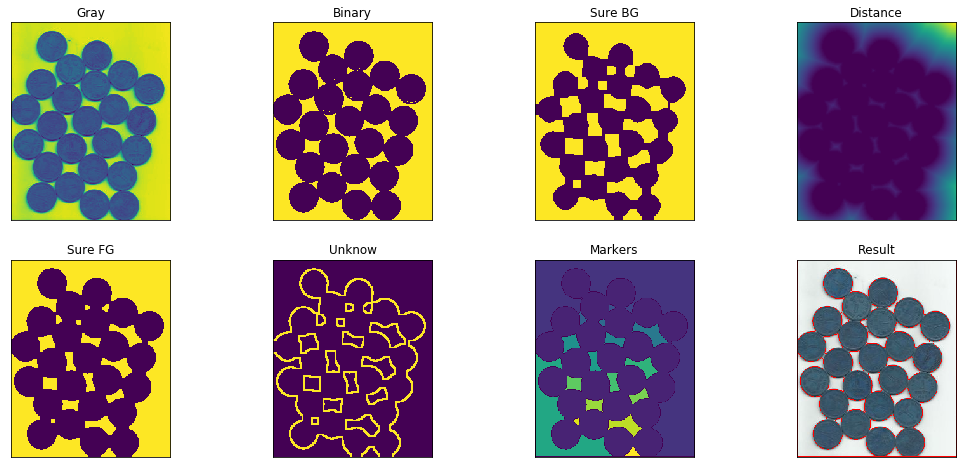

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('./images/coins.jpg')

# gray -> binary 변환
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)


kernel = np.ones((3,3), np.uint8)
# opening 연산으로 noise 제거
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# background, foreground 구분
# dilate로 경계확장 해 연결되지 않은 부분을 background로
# foreground는 opening결과에 거리변환함수 적용 -> 중심으로부터 skeleton image 얻을 수 있음(중심으로부터 점점 옅어지는 영상)
# skeleton image에 threshold적용해 확실한 전경 찾아냄

# dilate
#밝은부분-배경
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# distance trasform 
# 배경으로부터의 거리 계산 - 멀수록 밝아짐
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# absolutely foreground
ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

# 전경/배경 확실치 않은 영역 파악
# Background-Foreground
# 밝게 나오겠지
unknown = cv2.subtract(sure_bg, sure_fg)

# labeling foreground
ret, markers = cv2.connectedComponents(sure_fg)
print('ret',ret,'markers',markers)

markers = markers + 1
markers[unknown==255] = 0

# watershed 적용,  경계영역에 색 지정
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

images = [img_gray, thresh, sure_bg, dist_transform, sure_fg, unknown, markers, img]
titles = ['Gray','Binary','Sure BG','Distance','Sure FG','Unknow','Markers','Result']

plt.figure(figsize=(18, 8))
for i in range(len(images)):
    plt.subplot(2, 4,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()
cv2.imshow('img_gray', img_gray)
cv2.imshow('result', img)
cv2.imshow('sure_bg', sure_bg)
cv2.imshow('binary', thresh)
cv2.imshow('distance', dist_transform)
cv2.imshow('sure_fg', sure_fg)
cv2.imshow('unknown', unknown)
#cv2.imshow('Markers', markers)
cv2.waitKey()
cv2.destroyAllWindows()

## Optical Flow

In [5]:
# calcOpticalFlowFarneback
import cv2
import numpy as np
import sys

cap = cv2.VideoCapture('./images/vtest.avi')
ret, frame1 = cap.read()
if not ret:
    print('video load error')
    sys.exit()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY) # gray변환
hsv = np.zeros_like(frame1) # frame1영상과 같은 크기의 0 행렬
hsv[...,1] = 255 #명도 최댓값
while True:
    ret, frame2 = cap.read()
    if not ret:
        print('video load error')
        sys.exit()
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)# gray 변환
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow('frame2', rgb)
    k = cv2.waitKey() & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv2.imwrite('opticalfb.png', frame2)
        cv2.imwrite('opticalhsv', rgb)
        
    prvs = next
cap.release()
cv2.destroyAllWindows()

In [2]:
# calcOpticalflowPyrLK
import numpy as np
import cv2
import sys
cap = cv2.VideoCapture('./images/vtest.avi')
# Params for ShiTomasi corner detection
feature_params = dict(maxCorners = 100, qualityLevel = 0.01, minDistance=30, blockSize=14)
# parameters for lucas kanade optical flow
lk_params = dict(winSize=(15,15), maxLevel=0, criteria=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT, 10, 0.03))
color = np.random.randint(0, 255, (100,3)) # Create some random colors
ret, old_frame = cap.read() # Take first frame and find corners in it
if not ret:
    sys.exit()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
# 특징점 p0
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
mask = np.zeros_like(old_frame) # Create a mask image for drawing purposes
while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    # **: dictionary 형태로 parameters 받을 때
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    good_new = p1[st==1]
    good_old = p0[st==1]
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        # 움직이는 지점 선긋기
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(),2)
        # 현재지점 점찍기
        frame = cv2.circle(frame, (a,b), 5, color[i].tolist(), -1)
        
        img = cv2.add(frame, mask)
        cv2.imshow('frame', img)
        k = cv2.waitKey(1) & 0xff
        if k == 27:
            break
        # update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 